In [1]:
# Student Name: David de Andres Hernandez
# Matriculation Number: 3755457

# Discrete Event Simulator (DES) - Part 5

# Verification

In [2]:
import part5_simstudy as p5
import warnings
warnings.filterwarnings('ignore')

### Task 5.2.1: Multiple Runs Confidence
Implement simulation routine, that runs fixed time simulations until the width of the confidence interval is small enough. For this, call your simulation like in the previous tasks with a simulation time of 100 s and 1000 s repectively. After each run, extract the blocking probability and add it to a TIC. Calculate the width of the confidence interval and stop your simulations when it is below two times ε. Use ρ = 0.9 and S=4 and calculate the number of runs for a confidence level of 0.9 and 0.95.*Hint: Think of a reasonable lag size. Choosing one lag size is not enough for a good verification.*

In [3]:
p5.task_5_2_1()

SIM TIME:  100s; ALPHA: 10%; NUMBER OF RUNS: 1087; TOTAL SIMULATION TIME (SECONDS): 108700
SIM TIME:  100s; ALPHA:  5%; NUMBER OF RUNS: 1525; TOTAL SIMULATION TIME (SECONDS): 152500
SIM TIME: 1000s; ALPHA: 10%; NUMBER OF RUNS:  116; TOTAL SIMULATION TIME (SECONDS): 116000
SIM TIME: 1000s; ALPHA:  5%; NUMBER OF RUNS:  168; TOTAL SIMULATION TIME (SECONDS): 168000


[1087, 1525, 116, 168]

### Task 5.2.2: Batch Confidence
Now there should be no event SimulationTermination and the simulation keeps running. For each N = 100 (N = 1000) packets, the blocking probability is read and is added to a TIC. Then the statistics collected in simresult should be reset manually. Stop the simulation when the width of the confidence interval is below two times ε. Calculate the total simulation time for a confidence level of 0.9 and 0.95 (ρ = 0.9, S=4). Hint: You have to use (and, maybe, modify) the function do_simulation_n_limit() in class Simulation, according to which the simulation stops after a total packet count of N.


In [4]:
p5.task_5_2_2()

BATCH SIZE:  100; ALPHA: 10%; TOTAL SIMULATION TIME (SECONDS): 0.995
BATCH SIZE:  100; ALPHA:  5%; TOTAL SIMULATION TIME (SECONDS): 1.352
BATCH SIZE: 1000; ALPHA: 10%; TOTAL SIMULATION TIME (SECONDS): 0.088
BATCH SIZE: 1000; ALPHA:  5%; TOTAL SIMULATION TIME (SECONDS): 0.137


[995, 1352, 88, 137]


### Task 5.2.4: Confidence Plots II
Make the following simulation study. Use an M/M/1/∞ system and perform multiple runs simulation. Make your study for system offered traffic 0.5 and 0.9. Use confidence levels of 0.9 and 0.95. Use 100 s and 1000 s as simulation time. Calculate the confidence interval for the system throughput of 30 runs. Repeat this 100 times. Take each confidence interval and plot it with your implemented function (see task 5.2.3). On the x-axis you should have values from 1 to 100 (for every repetition, each of 30 runs) and on the y-axis the given calculated mean value with the error bars. Also plot the theoretical value as a dashed line.

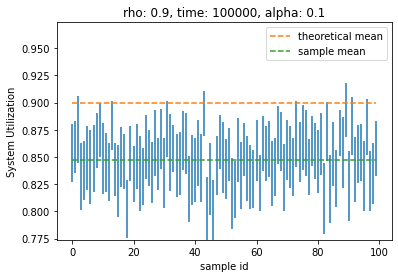

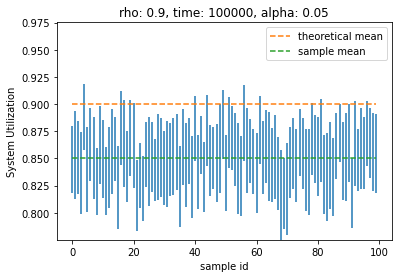

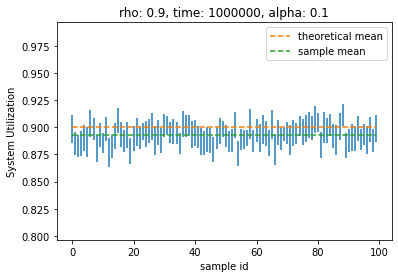

KeyboardInterrupt: 

In [5]:
p5.task_5_2_4()

#  Analysis and General Questions

### Task 5.3.1: Confidence Interval Width
*How many runs do you need in each setup of tasks 5.2.1 and 5.2.2? Compare all eight values and explain, why they differ and which are the advantages of the setups.*

### Task 5.3.2: Confidence Interval Width
Compared to the actual blocking probability calculated by an analytic formula
$$
P(S) = \frac{(1−\rho)\rho^{S+1}}{1-\rho^{S+2}}
$$
the blocking probability in task 5.2.1 always differs. Why is this the case and does it differ in task 5.2.2 as well?

### Task 5.3.3: Confidence Interval Width
What can you observe in the plots of task 5.2.4? What are the differences between the plots? How many intervals are covering the true value and how many not? How does the skewness affect the calculation of confidence intervals?


### Task 5.3.4: Variable Simulation Time
Would it also be an option to do a simulation with an infinite simulation time (and stop as soon as a given confidence level is reached) and take the samples for the blocking probability each time a packet is dropped? Justify your answer!

### Task 5.3.5: Bootstrapping
What’s the advantage of bootstrap confidence interval over normal confidence interval? Under which case would the two types of confidence interval become the same?